In [28]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


In [2]:
cat4 = cv2.imread('../CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

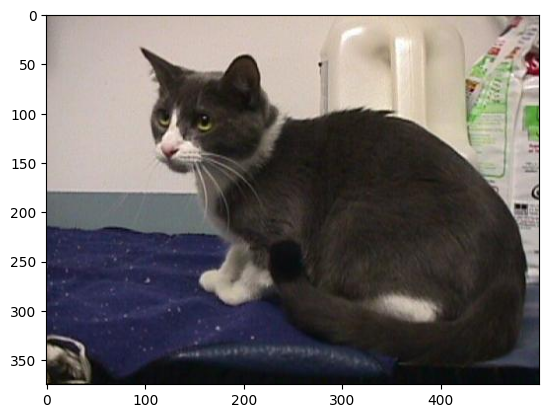

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog = cv2.imread('../CATS_DOGS/train/DOG/2.jpg')

In [7]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

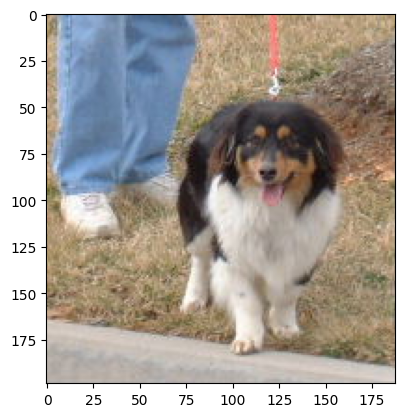

In [8]:
plt.imshow(dog)

In [9]:
dog.shape

(199, 188, 3)

In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range = 30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

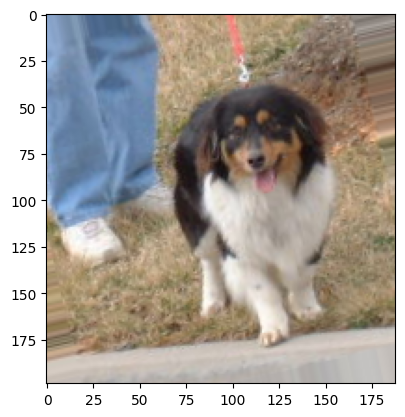

In [19]:
plt.imshow(image_gen.random_transform(dog))

In [20]:
image_gen.flow_from_directory('../CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [44]:
input_shape = (150,150,3)

In [29]:
from keras.models import Sequential

In [37]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [39]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 17, 17, 64)      

In [45]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../CATS_DOGS/train',
                                                target_size=input_shape[:2],
                                                batch_size= batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [46]:

test_image_gen = image_gen.flow_from_directory('../CATS_DOGS/test',
                                                target_size=input_shape[:2],
                                                batch_size= batch_size,
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [47]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [49]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

/var/folders/mx/3d7md9h55sn2xh6ln_rf4gdc0000gn/T/ipykernel_38242/2328083849.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,


150/150 [==============================] - 8s 53ms/step - loss: 0.6873 - accuracy: 0.5467 - val_loss: 0.6892 - val_accuracy: 0.5417
